In [2]:
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd 


In [3]:
iris = load_iris() # having 4 dimensions

In [4]:
X=iris.data
y=iris.target


In [5]:
X.shape

(150, 4)

<Axes: >

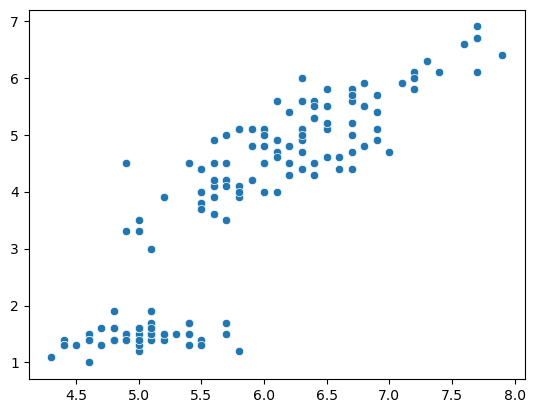

In [6]:
sns.scatterplot(x=X[:,0],y=X[:,2])

In [9]:
# always scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# optional - dimensionality reduciton using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(X_scaled)

In [11]:
# chooose k
#elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

<Axes: >

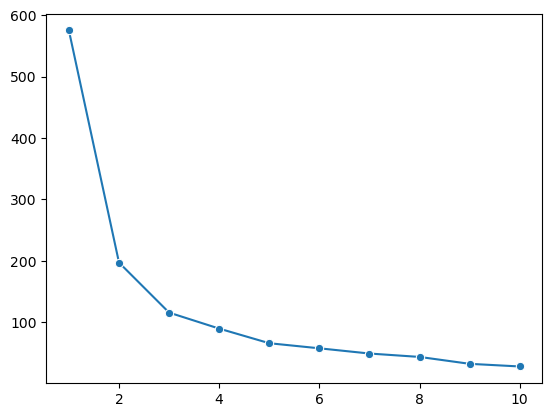

In [12]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

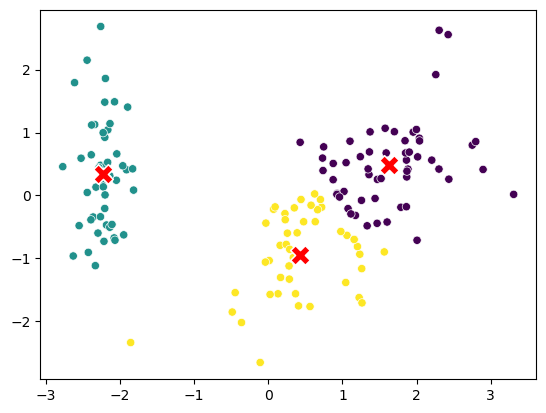

In [17]:
# therefore k = 3
kmeans= KMeans(n_clusters=3,random_state=10)
labels = kmeans.fit_predict(pca_data)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker="X",c="red",s=200)